# MLD computation

This notebook will look at the MLD from the floats during DY180 and compare the values with those of the CTD.

In [2]:
import xarray as xr
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


float1 = xr.open_dataset("C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/argo_nc/4903659_Sprof.nc")
float2 = xr.open_dataset("C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/argo_nc/6990636_Sprof.nc")

In [3]:
# Select variables of interest from both datasets
vars_of_interest = ["PLATFORM_NUMBER", "JULD", "PRES", "LONGITUDE", "LATITUDE", "CYCLE_NUMBER", "TEMP", "PSAL", "PSAL_QC", "TEMP_QC", "PSAL_ADJUSTED", "TEMP_ADJUSTED", "PSAL_ADJUSTED_QC", "TEMP_ADJUSTED_QC"]

# Convert xarray datasets to pandas DataFrames, then to polars DataFrames
df1 = float1[vars_of_interest].to_dataframe().reset_index()
df2 = float2[vars_of_interest].to_dataframe().reset_index()

df1["PLATFORM_NUMBER"] = df1["PLATFORM_NUMBER"].astype(str)
df2["PLATFORM_NUMBER"] = df2["PLATFORM_NUMBER"].astype(str)

df1["PSAL_QC"] = df1["PSAL_ADJUSTED_QC"].astype("Float32")
df2["PSAL_QC"] = df2["PSAL_ADJUSTED_QC"].astype("Float32")


pl_df1 = pl.from_pandas(df1).filter(pl.col("PSAL") >= 34)
pl_df2 = pl.from_pandas(df2).filter(pl.col("PSAL") >= 34)

df1 = df1[df1["PSAL"] > 34.8]
df2 = df2[df2["PSAL"] > 34.8]

df1["PSAL"] = df1["PSAL_ADJUSTED"]
df2["PSAL"] = df2["PSAL_ADJUSTED"]


df1 = df1[df1["PSAL_QC"] < 2]
df2 = df2[df2["PSAL_QC"] < 2]

# Concatenate the two polars DataFrames
pl_df = pl.concat([pl_df1, pl_df2])
pl_df

N_PROF,N_LEVELS,PLATFORM_NUMBER,JULD,PRES,LONGITUDE,LATITUDE,CYCLE_NUMBER,TEMP,PSAL,PSAL_QC,TEMP_QC,PSAL_ADJUSTED,TEMP_ADJUSTED,PSAL_ADJUSTED_QC,TEMP_ADJUSTED_QC
i64,i64,str,datetime[ns],f32,f64,f64,f64,f32,f32,f32,binary,f32,f32,binary,binary
0,15,"""4903659 """,2024-05-28 10:01:58.000000512,1.432,-23.996627,59.997924,1.0,9.737336,34.385113,null,"b""8""",null,null,null,null
0,16,"""4903659 """,2024-05-28 10:01:58.000000512,1.49,-23.996627,59.997924,1.0,9.7295,35.139999,null,"b""1""",null,null,null,null
0,17,"""4903659 """,2024-05-28 10:01:58.000000512,1.532,-23.996627,59.997924,1.0,9.729581,35.140381,null,"b""8""",null,null,null,null
0,18,"""4903659 """,2024-05-28 10:01:58.000000512,1.632,-23.996627,59.997924,1.0,9.729773,35.141289,null,"b""8""",null,null,null,null
0,19,"""4903659 """,2024-05-28 10:01:58.000000512,1.732,-23.996627,59.997924,1.0,9.729964,35.1422,null,"b""8""",null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
50,1435,"""6990636 """,2025-02-13 11:44:27.022388736,1897.800049,-32.230703,57.178616,39.0,3.3,34.972,8.0,"b""8""",34.972,3.3,"b""8""","b""8"""
50,1436,"""6990636 """,2025-02-13 11:44:27.022388736,1897.900024,-32.230703,57.178616,39.0,3.3,34.972,1.0,"b""1""",34.972,3.3,"b""1""","b""1"""
50,1437,"""6990636 """,2025-02-13 11:44:27.022388736,1898.319946,-32.230703,57.178616,39.0,3.3,34.972,8.0,"b""8""",34.972,3.3,"b""8""","b""8"""


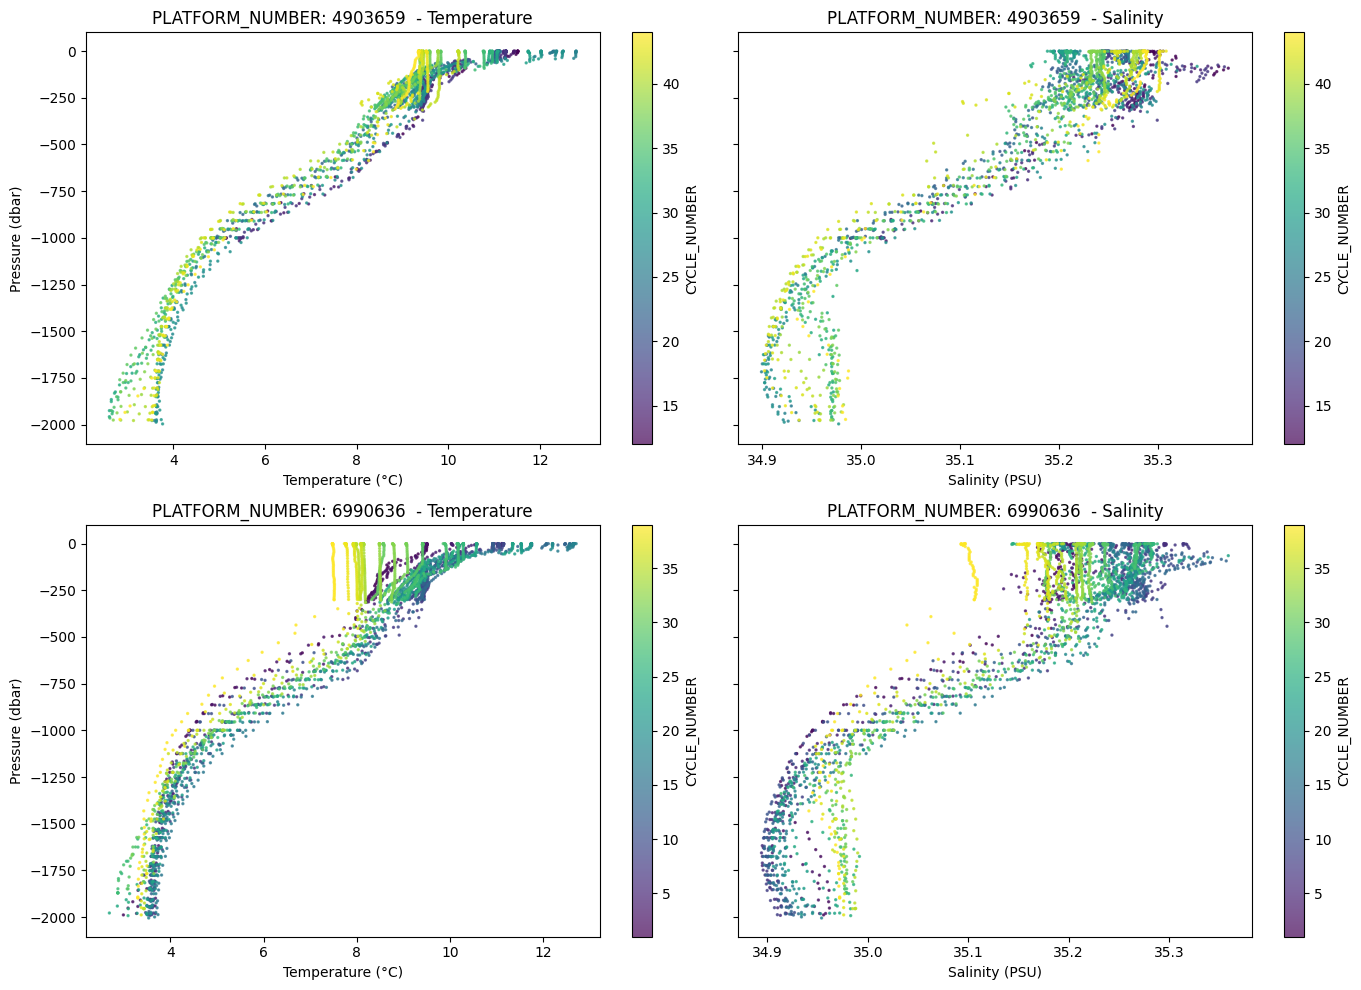

In [4]:

# Prepare data for plotting
dfs = [df1, df2]
platforms = [df1["PLATFORM_NUMBER"].iloc[0], df2["PLATFORM_NUMBER"].iloc[0]]
titles = [f"PLATFORM_NUMBER: {platforms[0]}", f"PLATFORM_NUMBER: {platforms[1]}"]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
for i, df in enumerate(dfs):
    # Remove rows with missing values for plotting
    temp_df = df.dropna(subset=["TEMP", "PRES", "CYCLE_NUMBER"])
    psal_df = df.dropna(subset=["PSAL", "PRES", "CYCLE_NUMBER"])
    
    # Temperature profile
    sc1 = axs[i, 0].scatter(
        temp_df["TEMP"], -temp_df["PRES"], 
        c=temp_df["CYCLE_NUMBER"], cmap="viridis", s=2, alpha=0.7
    )
    axs[i, 0].set_xlabel("Temperature (°C)")
    axs[i, 0].set_ylabel("Pressure (dbar)")
    axs[i, 0].set_title(f"{titles[i]} - Temperature")
    axs[i, 0].invert_yaxis()  
    plt.colorbar(sc1, ax=axs[i, 0], label="CYCLE_NUMBER")
    
    # Salinity profile
    sc2 = axs[i, 1].scatter(
        psal_df["PSAL"], -psal_df["PRES"], 
        c=psal_df["CYCLE_NUMBER"], cmap="viridis", s=2, alpha=0.7
    )
    axs[i, 1].set_xlabel("Salinity (PSU)")
    axs[i, 1].set_title(f"{titles[i]} - Salinity")
    axs[i, 1].invert_yaxis() 
    plt.colorbar(sc2, ax=axs[i, 1], label="CYCLE_NUMBER")


plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import re
from datetime import datetime, date, time
from pathlib import Path
def read_ctd(filepath):


    # Read column names from line 27 (R skips 26 lines, so read line 27 as header)
    cols = pd.read_csv(filepath, skiprows=26, nrows=0)
    cols_name = cols.columns.tolist()

    # Read actual data (R skips 28 lines, so data starts at line 29)
    dat = pd.read_csv(filepath, skiprows=28, header=None)
    dat.columns = cols_name

    # Read raw lines for metadata
    with open(filepath, "r") as f:
        raw_dat = f.readlines()

    # Extract LON
    lon_line = next(line for line in raw_dat if "LON" in line)
    lon = float(re.search(r"=(.*)", lon_line).group(1).strip())

    # Extract LAT
    lat_line = next(line for line in raw_dat if "LAT" in line)
    lat = float(re.search(r"=(.*)", lat_line).group(1).strip())

    # Add to dataframe
    dat["lon"] = lon
    dat["lat"] = lat

    # Extract DATE (second match, as in R)
    date_lines = [line for line in raw_dat if "DATE" in line]
    date_str = re.search(r"=(.*)", date_lines[1]).group(1).strip()
    date_val = pd.to_datetime(date_str).date()

    # Extract TIME
    time_line = next(line for line in raw_dat if "TIME" in line)
    time_str = re.search(r"= (.*)", time_line).group(1).strip()

    # Parse TIME (e.g. "1025" → "10:25")
    time_str_formatted = re.sub(r"^([0-9]{2})([0-9]+)$", r"\1:\2", time_str)
    time_val = pd.to_datetime(time_str_formatted, format="%H:%M").time()

    # Combine date and time
    datetime_val = datetime.combine(date_val, time_val)

    # Add datetime to dataframe
    dat["datetime"] = datetime_val
    return dat


In [6]:
import os

# Define the parent directory
parent_dir = "C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/CTD/DY180/74EQ20240522_ct1"

# List to hold each parsed DataFrame
dataframes = []

# Loop through all files in the parent directory and subdirectories
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            try:
                df = read_ctd(file_path)
                dataframes.append(df)
            except Exception as e:
                print(f"Failed to read {file_path}: {e}")

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display summary
print(f"Loaded {len(dataframes)} files. Combined shape: {combined_df.shape}")

Loaded 52 files. Combined shape: (21863, 18)


In [7]:
# Sort by datetime before assigning profile_idx
combined_df = combined_df.sort_values("datetime").reset_index(drop=True)
combined_df["profile_idx"] = (
    combined_df.groupby(["lon", "lat", "datetime"]).ngroup() + 1
)


## Making a table of closest profiles

In [8]:
unique_profiles = combined_df[['lon', 'lat', 'datetime', 'profile_idx']].drop_duplicates().reset_index(drop=True)
unique_profiles

,lon,lat,datetime,profile_idx
0,-22.49730,59.18032,2024-05-26 12:11:00,28
1,-24.00044,60.00012,2024-05-27 04:37:00,14
2,-24.00042,60.00014,2024-05-27 07:40:00,15
3,-24.00016,60.00016,2024-05-28 03:33:00,18
4,-24.00020,60.00018,2024-05-28 05:28:00,17
5,-24.00032,60.00020,2024-05-28 11:44:00,16
6,-23.99962,59.99992,2024-05-29 12:31:00,19
7,-23.90546,59.73574,2024-05-29 20:09:00,20
8,-26.83022,56.21604,2024-05-31 02:04:00,5
9,-26.83022,56.21602,2024-05-31 03:39:00,4


In [9]:
from datetime import datetime

unique_floats = pl_df.select(
	pl.col("PLATFORM_NUMBER"),
	pl.col("CYCLE_NUMBER"),
	pl.col("LONGITUDE"),
	pl.col("LATITUDE"),
	pl.col("JULD")
).unique().sort("PLATFORM_NUMBER").filter(
	pl.col("JULD") < datetime(2024, 6, 23)
)

In [10]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lon1, lat1, lon2, lat2):
    # Earth radius in kilometers
    R = 6371.0
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [11]:
from scipy.spatial import cKDTree
from datetime import timedelta

# Prepare arrays for fast nearest neighbor search
# unique_profiles: lon, lat, datetime
# unique_floats: LONGITUDE, LATITUDE, JULD

# Convert to numpy arrays
profile_coords = unique_profiles[["lon", "lat"]].to_numpy()
profile_times = pd.to_datetime(unique_profiles["datetime"]).astype("int64") // 10**9  # seconds since epoch

float_coords = unique_floats.select(["LONGITUDE", "LATITUDE"]).to_numpy()
float_times = pd.to_datetime(unique_floats["JULD"].to_pandas()).astype("int64") // 10**9  # seconds since epoch

TIME_SCALE = 1 / (3600 * 24)  # seconds to days

tree = cKDTree(
    np.column_stack([float_coords, float_times * TIME_SCALE])
)

results = []
for row in unique_profiles.itertuples(index=True):
    plon = row.lon
    plat = row.lat
    ptime = pd.to_datetime(row.datetime).value // 10**9  # seconds
    point = [plon, plat, ptime * TIME_SCALE]
    
    dist, i = tree.query(point)
    tdiff = abs(ptime - float_times[i])
    
    results.append({
        "profile_idx": row.profile_idx,
        "profile_lon": plon,
        "profile_lat": plat,
        "profile_datetime": row.datetime,
        "float_platform_number": unique_floats["PLATFORM_NUMBER"][i],
        "float_cycle_number": unique_floats["CYCLE_NUMBER"][i],
        "space_distance_km": haversine_distance(plon, plat, float_coords[i][0], float_coords[i][1]),
        "time_distance_sec": tdiff
    })

# Convert to DataFrame for display
closest_df = pd.DataFrame(results)
closest_df["time_distance_hr"] = closest_df["time_distance_sec"] / 3600
closest_df

,profile_idx,profile_lon,profile_lat,profile_datetime,float_platform_number,float_cycle_number,space_distance_km,time_distance_sec,time_distance_hr
0,28,-22.49730,59.18032,2024-05-26 12:11:00,6990636,1.0,123.269837,165290,45.913889
1,14,-24.00044,60.00012,2024-05-27 04:37:00,4903659,1.0,0.323394,105898,29.416111
2,15,-24.00042,60.00014,2024-05-27 07:40:00,4903659,1.0,0.324353,94918,26.366111
3,18,-24.00016,60.00016,2024-05-28 03:33:00,4903659,1.0,0.316888,23338,6.482778
4,17,-24.00020,60.00018,2024-05-28 05:28:00,4903659,1.0,0.320012,16438,4.566111
5,16,-24.00032,60.00020,2024-05-28 11:44:00,6990636,1.0,1.103275,5890,1.636111
6,19,-23.99962,59.99992,2024-05-29 12:31:00,6990636,1.0,7.271810,1221,0.339167
7,20,-23.90546,59.73574,2024-05-29 20:09:00,6990636,2.0,30.190356,23364,6.490000
8,5,-26.83022,56.21604,2024-05-31 02:04:00,4903659,2.0,458.840582,36986,10.273889
9,4,-26.83022,56.21602,2024-05-31 03:39:00,4903659,2.0,458.842649,31286,8.690556


In [12]:
slected_profs = closest_df[(closest_df["time_distance_hr"] < 6) & (closest_df["space_distance_km"] < 15)].sort_values("space_distance_km").reset_index(drop=True)

## Compute MLD on floats data

In [13]:
# Concatenate df1 and df2 into a single DataFrame
df_all = pd.concat([df1, df2], ignore_index=True)


In [14]:
import gsw

# Compute density (sigma0) from PSAL_ADJUSTED, TEMP, and pressure (PRES) for the floats data
# Use longitude and latitude for absolute salinity and conservative temperature if needed

# Absolute Salinity and Conservative Temperature
SA = gsw.SA_from_SP(df_all["PSAL_ADJUSTED"].values, df_all["PRES"].values, df_all["LONGITUDE"].values, df_all["LATITUDE"].values)
CT = gsw.CT_from_t(SA, df_all["TEMP"].values, df_all["PRES"].values)
sigma0 = gsw.sigma0(SA, CT)
df_all["sigma0"] = sigma0
df_all.head()

,N_PROF,N_LEVELS,PLATFORM_NUMBER,JULD,PRES,LONGITUDE,LATITUDE,CYCLE_NUMBER,TEMP,PSAL,PSAL_QC,TEMP_QC,PSAL_ADJUSTED,TEMP_ADJUSTED,PSAL_ADJUSTED_QC,TEMP_ADJUSTED_QC,sigma0
0,23,8,4903659,2024-06-22 12:51:22.981970944,0.9,-18.437047,60.154115,12.0,11.517614,35.289501,1.0,b'3',35.289501,11.523000,b'1',b'1',26.908690
1,23,9,4903659,2024-06-22 12:51:22.981970944,1.0,-18.437047,60.154115,12.0,11.516508,35.293999,1.0,b'3',35.293999,11.521667,b'1',b'1',26.912397
2,23,10,4903659,2024-06-22 12:51:22.981970944,1.1,-18.437047,60.154115,12.0,11.515403,35.282997,1.0,b'3',35.282997,11.521500,b'1',b'1',26.904051
3,23,11,4903659,2024-06-22 12:51:22.981970944,1.2,-18.437047,60.154115,12.0,11.514297,35.286999,1.0,b'3',35.286999,11.522500,b'1',b'1',26.907372
4,23,17,4903659,2024-06-22 12:51:22.981970944,1.7,-18.437047,60.154115,12.0,11.509988,35.281502,1.0,b'8',35.281502,11.522500,b'1',b'1',26.903915


In [15]:
import gsw

def compute_mld_sigma0(df, delta_sigma=0.05):
    """
    Compute MLD as the shallowest depth where sigma0 increases by delta_sigma from the surface value.
    Assumes df is sorted by PRES ascending and contains columns 'PRES' and 'sigma0'.
    """
    # Remove NaNs and sort
    df = df.dropna(subset=['PRES', 'sigma0']).sort_values('PRES')
    if df.empty:
        return np.nan

    # Surface sigma0 (shallowest pressure)
    surface_sigma0 = df.iloc[0]['sigma0']
    # Find first depth where sigma0 exceeds surface_sigma0 + delta_sigma
    mld_row = df[df['sigma0'] > surface_sigma0 + delta_sigma]
    if not mld_row.empty:
        return mld_row.iloc[0]['PRES']
    else:
        return np.nan

def compute_buoyancy_frequency(df):
    """
    Compute squared buoyancy frequency (N^2) profile using gsw.Nsquared.
    Returns mid-pressure and N2 arrays.
    """
    # Remove NaNs and sort
    df = df.dropna(subset=['PRES', 'PSAL_ADJUSTED', 'TEMP_ADJUSTED', 'LONGITUDE', 'LATITUDE']).sort_values('PRES')
    if len(df) < 2:
        return np.array([]), np.array([])

    SA = gsw.SA_from_SP(df['PSAL_ADJUSTED'].values, df['PRES'].values, df['LONGITUDE'].values[0], df['LATITUDE'].values[0])
    CT = gsw.CT_from_t(SA, df['TEMP_ADJUSTED'].values, df['PRES'].values)
    p = df['PRES'].values
    n2, p_mid = gsw.Nsquared(SA, CT, p, df['LATITUDE'].values[0])
    return p_mid, n2

# Example usage for a single float profile (e.g., for platform_number and cycle_number)
def get_profile(df, platform_number, cycle_number):
    return df[(df['PLATFORM_NUMBER'] == platform_number) & (df['CYCLE_NUMBER'] == cycle_number)]

# Compute for a selected profile (example: first row of slected_profs)
row = slected_profs.iloc[0]
profile = get_profile(df_all, row['float_platform_number'], row['float_cycle_number'])

mld_sigma0 = compute_mld_sigma0(profile)
p_mid, n2 = compute_buoyancy_frequency(profile)

print(f"MLD (sigma0 + 0.05): {mld_sigma0:.2f} dbar")
if len(n2) > 0:
    print(f"Max buoyancy frequency N²: {np.nanmax(n2):.4e} 1/s² at {p_mid[np.nanargmax(n2)]:.2f} dbar")
else:
    print("Not enough data for N² calculation.")

MLD (sigma0 + 0.05): nan dbar
Not enough data for N² calculation.


In [16]:
# Loop through all unique (PLATFORM_NUMBER, CYCLE_NUMBER) in df_all and compute MLD by both methods
mld_sigma0_list = []
mld_temp_list = []
platforms = df_all["PLATFORM_NUMBER"].unique()
for platform in platforms:
    cycles = df_all[df_all["PLATFORM_NUMBER"] == platform]["CYCLE_NUMBER"].unique()
    for cycle in cycles:
        prof = df_all[(df_all["PLATFORM_NUMBER"] == platform) & (df_all["CYCLE_NUMBER"] == cycle)]
        # MLD by sigma0 (density threshold)
        mld_sigma0 = compute_mld_sigma0(prof)
        # MLD by temperature threshold (e.g., 0.2°C drop from surface)
        def compute_mld_temp(df, delta_temp=0.2):
            df = df.dropna(subset=['PRES', 'TEMP']).sort_values('PRES')
            if df.empty:
                return np.nan
            surface_temp = df.iloc[0]['TEMP']
            mld_row = df[df['TEMP'] < surface_temp - delta_temp]
            if not mld_row.empty:
                return mld_row.iloc[0]['PRES']
            else:
                return np.nan
        mld_temp = compute_mld_temp(prof)
        mld_sigma0_list.append({
            "PLATFORM_NUMBER": platform,
            "CYCLE_NUMBER": cycle,
            "MLD_sigma0": mld_sigma0,
            "MLD_temp": mld_temp
        })

# Convert results to DataFrame
mld_df = pd.DataFrame(mld_sigma0_list)

In [17]:
# Merge MLD values from mld_df to slected_profs using PLATFORM_NUMBER and CYCLE_NUMBER
# Ensure types match for merge
slected_profs_merged = slected_profs.copy()
slected_profs_merged["float_platform_number"] = slected_profs_merged["float_platform_number"].str.strip()
mld_df["PLATFORM_NUMBER"] = mld_df["PLATFORM_NUMBER"].str.strip()

merged = pd.merge(
    slected_profs_merged,
    mld_df,
    left_on=["float_platform_number", "float_cycle_number"],
    right_on=["PLATFORM_NUMBER", "CYCLE_NUMBER"],
    how="left"
)

# Drop duplicate columns if desired
merged = merged.drop(columns=["PLATFORM_NUMBER", "CYCLE_NUMBER"])
merged






,profile_idx,profile_lon,profile_lat,profile_datetime,float_platform_number,float_cycle_number,space_distance_km,time_distance_sec,time_distance_hr,MLD_sigma0,MLD_temp
0,17,-24.00020,60.00018,2024-05-28 05:28:00,4903659,1.0,0.320012,16438,4.566111,NaN,NaN
1,16,-24.00032,60.00020,2024-05-28 11:44:00,6990636,1.0,1.103275,5890,1.636111,65.019997,65.019997
2,19,-23.99962,59.99992,2024-05-29 12:31:00,6990636,1.0,7.271810,1221,0.339167,65.019997,65.019997
3,50,-18.93270,60.12272,2024-06-21 02:00:00,4903659,11.0,10.481621,11842,3.289444,NaN,NaN
4,49,-18.93284,60.11888,2024-06-21 03:42:00,4903659,11.0,10.592197,5722,1.589444,NaN,NaN
5,26,-22.62204,59.42422,2024-06-07 03:07:00,6990636,5.0,12.915508,6680,1.855556,44.020000,24.900000
6,25,-22.62484,59.43162,2024-06-07 04:54:00,6990636,5.0,13.707190,13100,3.638889,44.020000,24.900000
7,48,-18.94230,60.12678,2024-06-21 11:28:00,4903659,12.0,13.750030,10228,2.841111,27.500000,27.500000


In [18]:
# Compute MLD for each CTD profile in combined_df using both sigma0 and temperature threshold methods

def compute_ctd_mld_sigma0(df, delta_sigma=0.05):
    """
    Compute MLD as the shallowest depth where sigma0 increases by delta_sigma from the surface value.
    Assumes df is sorted by PRES ascending and contains columns 'CTDPRS', 'CTDSAL', 'CTDTMP', 'lon', 'lat'.
    """
    df = df.dropna(subset=['CTDPRS', ' CTDSAL', ' CTDTMP', 'lon', 'lat']).sort_values('CTDPRS')
    if df.empty:
        return np.nan
    # Compute sigma0 using gsw
    SA = gsw.SA_from_SP(df[' CTDSAL'].values, df['CTDPRS'].values, df['lon'].values[0], df['lat'].values[0])
    CT = gsw.CT_from_t(SA, df[' CTDTMP'].values, df['CTDPRS'].values)
    sigma0 = gsw.sigma0(SA, CT)
    surface_sigma0 = sigma0[0]
    idx = np.argmax(sigma0 > surface_sigma0 + delta_sigma)
    if sigma0[idx] > surface_sigma0 + delta_sigma:
        return df['CTDPRS'].values[idx]
    else:
        return np.nan

def compute_ctd_mld_temp(df, delta_temp=0.2):
    """
    Compute MLD as the shallowest depth where temperature drops by delta_temp from the surface value.
    Assumes df is sorted by PRES ascending and contains column 'CTDTMP'.
    """
    df = df.dropna(subset=['CTDPRS', ' CTDTMP']).sort_values('CTDPRS')
    if df.empty:
        return np.nan
    surface_temp = df[' CTDTMP'].values[0]
    idx = np.argmax(df[' CTDTMP'].values < surface_temp - delta_temp)
    if df[' CTDTMP'].values[idx] < surface_temp - delta_temp:
        return df['CTDPRS'].values[idx]
    else:
        return np.nan


In [19]:
for col in combined_df.columns:
    print(col)

CTDPRS
 CTDTMP
 CTDTMP_FLAG_W
 CTDSAL
 CTDSAL_FLAG_W
 CTDOXY
 CTDOXY_FLAG_W
 CTDTURB
 CTDTURB_FLAG_W
 CTDXMISS
 CTDXMISS_FLAG_W
 CTDFLUOR
 CTDFLUOR_FLAG_W
 PAR
 PAR_FLAG_W
lon
lat
datetime
profile_idx


In [20]:

ctd_mld_results = []
for profile_idx in combined_df['profile_idx'].unique():
    prof = combined_df[combined_df['profile_idx'] == profile_idx]
    mld_sigma0 = compute_ctd_mld_sigma0(prof)
    mld_temp = compute_ctd_mld_temp(prof)
    ctd_mld_results.append({
        "profile_idx": profile_idx,
        "MLD_sigma0": mld_sigma0,
        "MLD_temp": mld_temp
    })

ctd_mld_df = pd.DataFrame(ctd_mld_results)
ctd_mld_df

,profile_idx,MLD_sigma0,MLD_temp
0,28,39.0,25.0
1,14,29.0,31.0
2,15,21.0,17.0
3,18,15.0,17.0
4,17,21.0,15.0
5,16,15.0,11.0
6,19,53.0,51.0
7,20,75.0,73.0
8,5,75.0,83.0
9,4,67.0,65.0


In [21]:
# Merge CTD MLD values to slected_profs, adding _CTD suffix to columns
merged_profiles = pd.merge(
    merged,
    ctd_mld_df.add_suffix('_CTD'),
    left_on='profile_idx',
    right_on='profile_idx_CTD',
    how='left'
).drop(columns=['profile_idx_CTD'])

merged_profiles

,profile_idx,profile_lon,profile_lat,profile_datetime,float_platform_number,float_cycle_number,space_distance_km,time_distance_sec,time_distance_hr,MLD_sigma0,MLD_temp,MLD_sigma0_CTD,MLD_temp_CTD
0,17,-24.00020,60.00018,2024-05-28 05:28:00,4903659,1.0,0.320012,16438,4.566111,NaN,NaN,21.0,15.0
1,16,-24.00032,60.00020,2024-05-28 11:44:00,6990636,1.0,1.103275,5890,1.636111,65.019997,65.019997,15.0,11.0
2,19,-23.99962,59.99992,2024-05-29 12:31:00,6990636,1.0,7.271810,1221,0.339167,65.019997,65.019997,53.0,51.0
3,50,-18.93270,60.12272,2024-06-21 02:00:00,4903659,11.0,10.481621,11842,3.289444,NaN,NaN,47.0,47.0
4,49,-18.93284,60.11888,2024-06-21 03:42:00,4903659,11.0,10.592197,5722,1.589444,NaN,NaN,51.0,49.0
5,26,-22.62204,59.42422,2024-06-07 03:07:00,6990636,5.0,12.915508,6680,1.855556,44.020000,24.900000,47.0,39.0
6,25,-22.62484,59.43162,2024-06-07 04:54:00,6990636,5.0,13.707190,13100,3.638889,44.020000,24.900000,57.0,45.0
7,48,-18.94230,60.12678,2024-06-21 11:28:00,4903659,12.0,13.750030,10228,2.841111,27.500000,27.500000,39.0,37.0


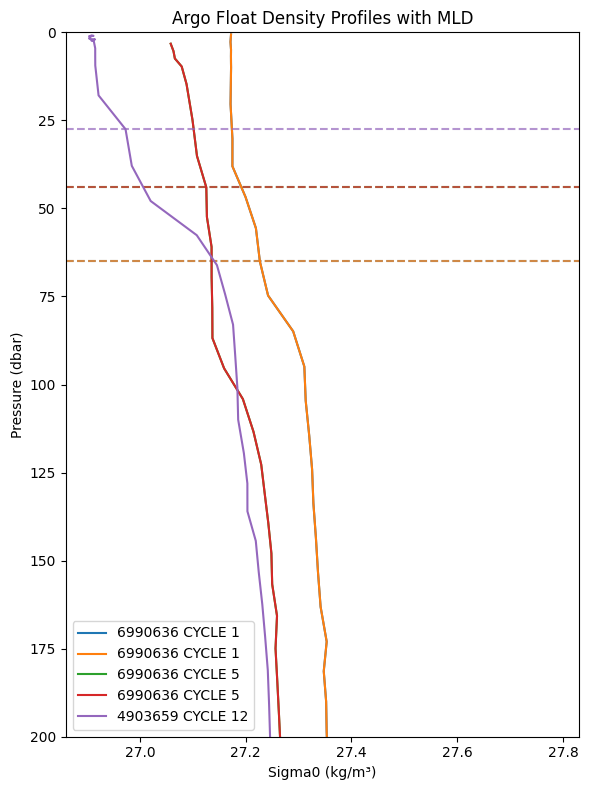

In [22]:
# Visualise density (sigma0) profiles for selected Argo float profiles with MLD position

fig, ax = plt.subplots(figsize=(6, 8))

for i, row in slected_profs.iterrows():
    # Get the float profile
    prof = df_all[
        (df_all["PLATFORM_NUMBER"].str.strip() == row["float_platform_number"].strip()) &
        (df_all["CYCLE_NUMBER"] == row["float_cycle_number"])
    ].dropna(subset=["PRES", "sigma0"])
    if prof.empty:
        continue

    # Compute MLD for this profile
    mld = compute_mld_sigma0(prof)

    # Plot density profile
    ax.plot(prof["sigma0"], prof["PRES"], label=f'{row["float_platform_number"].strip()} CYCLE {int(row["float_cycle_number"])}')

    # Plot MLD as a horizontal line
    if not np.isnan(mld):
        ax.axhline(mld, color=ax.lines[-1].get_color(), linestyle='--', alpha=0.7)

ax.invert_yaxis()
ax.set_xlabel("Sigma0 (kg/m³)")
ax.set_ylabel("Pressure (dbar)")
ax.set_ylim(200, 0)  # Adjust y-axis limits as needed
ax.set_title("Argo Float Density Profiles with MLD")
ax.legend()
plt.tight_layout()
plt.show()

In [24]:
# Define mapping from date to station name
station_map = {
    pd.Timestamp("2024-05-28").date(): "S1",
    pd.Timestamp("2024-06-07").date(): "S3",
    pd.Timestamp("2024-06-21").date(): "R5"
}

# Add "station_name" column based on profile_datetime date
merged_profiles["station_name"] = merged_profiles["profile_datetime"].dt.date.map(station_map)

# Remove rows with no station name and drop duplicates
filtered = merged_profiles.dropna(subset=["station_name"]).drop_duplicates()

filtered

,profile_idx,profile_lon,profile_lat,profile_datetime,float_platform_number,float_cycle_number,space_distance_km,time_distance_sec,time_distance_hr,MLD_sigma0,MLD_temp,MLD_sigma0_CTD,MLD_temp_CTD,station_name
0,17,-24.00020,60.00018,2024-05-28 05:28:00,4903659,1.0,0.320012,16438,4.566111,NaN,NaN,21.0,15.0,S1
1,16,-24.00032,60.00020,2024-05-28 11:44:00,6990636,1.0,1.103275,5890,1.636111,65.019997,65.019997,15.0,11.0,S1
3,50,-18.93270,60.12272,2024-06-21 02:00:00,4903659,11.0,10.481621,11842,3.289444,NaN,NaN,47.0,47.0,R5
4,49,-18.93284,60.11888,2024-06-21 03:42:00,4903659,11.0,10.592197,5722,1.589444,NaN,NaN,51.0,49.0,R5
5,26,-22.62204,59.42422,2024-06-07 03:07:00,6990636,5.0,12.915508,6680,1.855556,44.020000,24.900000,47.0,39.0,S3
6,25,-22.62484,59.43162,2024-06-07 04:54:00,6990636,5.0,13.707190,13100,3.638889,44.020000,24.900000,57.0,45.0,S3
7,48,-18.94230,60.12678,2024-06-21 11:28:00,4903659,12.0,13.750030,10228,2.841111,27.500000,27.500000,39.0,37.0,R5


In [25]:
# For each (float_platform_number, float_cycle_number), keep the row with the smallest time_distance_hr in the filtered df
filtered_unique = filtered.sort_values("time_distance_hr").drop_duplicates(
    subset=["float_platform_number", "float_cycle_number"], keep="first"
).reset_index(drop=True)

filtered_unique

,profile_idx,profile_lon,profile_lat,profile_datetime,float_platform_number,float_cycle_number,space_distance_km,time_distance_sec,time_distance_hr,MLD_sigma0,MLD_temp,MLD_sigma0_CTD,MLD_temp_CTD,station_name
0,49,-18.93284,60.11888,2024-06-21 03:42:00,4903659,11.0,10.592197,5722,1.589444,NaN,NaN,51.0,49.0,R5
1,16,-24.00032,60.00020,2024-05-28 11:44:00,6990636,1.0,1.103275,5890,1.636111,65.019997,65.019997,15.0,11.0,S1
2,26,-22.62204,59.42422,2024-06-07 03:07:00,6990636,5.0,12.915508,6680,1.855556,44.020000,24.900000,47.0,39.0,S3
3,48,-18.94230,60.12678,2024-06-21 11:28:00,4903659,12.0,13.750030,10228,2.841111,27.500000,27.500000,39.0,37.0,R5
4,17,-24.00020,60.00018,2024-05-28 05:28:00,4903659,1.0,0.320012,16438,4.566111,NaN,NaN,21.0,15.0,S1


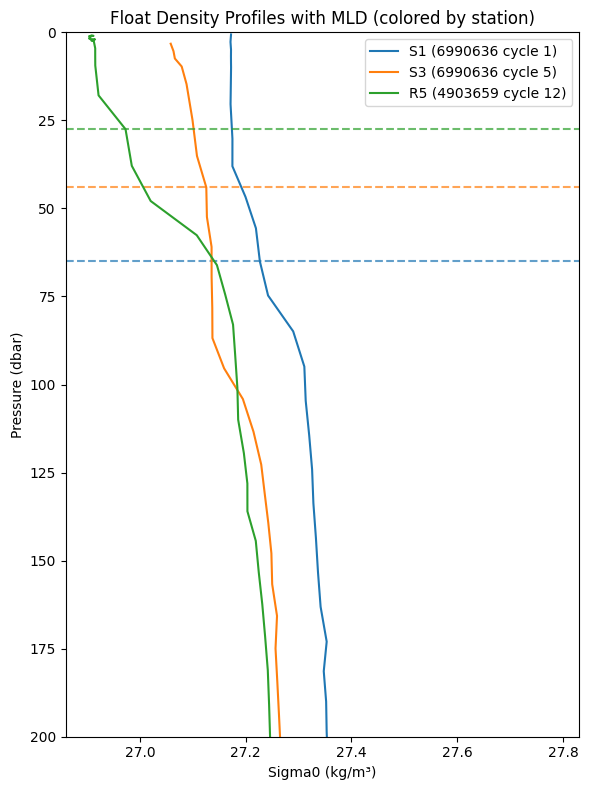

In [ ]:
# Filter for rows with a station name and drop duplicates
df_plot = slected_profs_merged[slected_profs_merged["station_name"].notna()]
df_plot = df_plot.drop_duplicates(subset=["float_platform_number", "float_cycle_number", "station_name"])

fig, ax = plt.subplots(figsize=(6, 8))

for _, row in df_plot.iterrows():
    prof = df_all[
        (df_all["PLATFORM_NUMBER"].str.strip() == str(row["float_platform_number"]).strip()) &
        (df_all["CYCLE_NUMBER"] == row["float_cycle_number"])
    ].dropna(subset=["PRES", "sigma0"])
    if prof.empty:
        continue

    mld = compute_mld_sigma0(prof)
    color = station_colors.get(row["station_name"], "k")
    ax.plot(prof["sigma0"], prof["PRES"], label=f'{row["station_name"]} ({row["float_platform_number"].strip()} cycle {int(row["float_cycle_number"])})', color=color)
    if not np.isnan(mld):
        ax.axhline(mld, color=color, linestyle='--', alpha=0.7)

ax.invert_yaxis()
ax.set_xlabel("Sigma0 (kg/m³)")
ax.set_ylabel("Pressure (dbar)")
ax.set_ylim(200, 0)
ax.set_title("Float Density Profiles with MLD (colored by station)")
ax.legend()
plt.tight_layout()
plt.show()


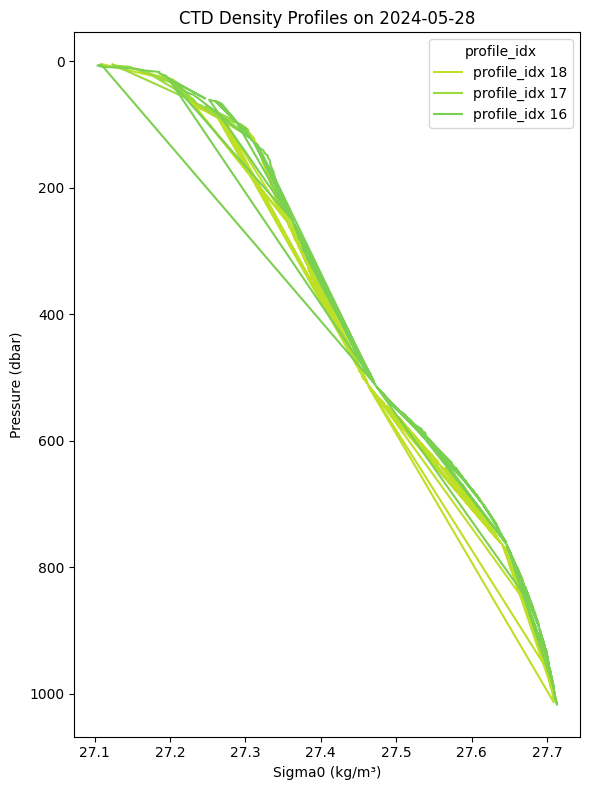

In [39]:
# Filter CTD profiles for 2024-05-28
date_of_interest = pd.Timestamp("2024-05-28").date()
ctd_profiles_28 = unique_profiles[unique_profiles["datetime"].dt.date == date_of_interest]

fig, ax = plt.subplots(figsize=(6, 8))

for _, prof_row in ctd_profiles_28.iterrows():
    prof_idx = prof_row["profile_idx"]
    prof = combined_df[combined_df["profile_idx"] == prof_idx]
    # Remove rows where CTDPRS or CTDSAL or CTDTMP is not a valid float
    prof = prof[pd.to_numeric(prof['CTDPRS'], errors='coerce').notna()]
    prof = prof[pd.to_numeric(prof[' CTDSAL'], errors='coerce').notna()]
    prof = prof[pd.to_numeric(prof[' CTDTMP'], errors='coerce').notna()]
    # Convert columns to float
    prof['CTDPRS'] = prof['CTDPRS'].astype(float)
    prof[' CTDSAL'] = prof[' CTDSAL'].astype(float)
    prof[' CTDTMP'] = prof[' CTDTMP'].astype(float)
    if prof.empty:
        continue
    SA = gsw.SA_from_SP(prof[' CTDSAL'].values, prof['CTDPRS'].values, prof['lon'].values[0], prof['lat'].values[0])
    CT = gsw.CT_from_t(SA, prof[' CTDTMP'].values, prof['CTDPRS'].values)
    sigma0 = gsw.sigma0(SA, CT)
    # Plot, color by profile_idx
    ax.plot(sigma0, prof['CTDPRS'], label=f'profile_idx {prof_idx}', color=plt.cm.viridis((prof_idx % 20) / 20))
    # Sort by profile_idx and CTDPRS (pressure)
    prof = prof.sort_values(["profile_idx", "CTDPRS"])
ax.invert_yaxis()
ax.set_xlabel("Sigma0 (kg/m³)")
ax.set_ylabel("Pressure (dbar)")
ax.set_title("CTD Density Profiles on 2024-05-28")
ax.legend(title="profile_idx")
plt.tight_layout()
plt.show()

In [36]:
# Prepare a summary table for sharing

# Select and rename columns for clarity
summary_table = merged_profiles[[
    "float_platform_number",
    "float_cycle_number",
    "station_name",
    "MLD_sigma0",
    "MLD_sigma0_CTD",
    "MLD_temp",
    "MLD_temp_CTD",
    "space_distance_km",
    "time_distance_hr"
]].rename(columns={
    "float_platform_number": "Float Number",
    "float_cycle_number": "Cycle Number",
    "station_name": "Station",
    "MLD_sigma0": "Float MLD (σ₀)",
    "MLD_sigma0_CTD": "CTD MLD (σ₀)",
    "MLD_temp": "Float MLD (buoyancy)",
    "MLD_temp_CTD": "CTD MLD (buoyancy)",
    "time_distance_hr": "Time Distance (hr)",
    "space_distance_km": "Space Distance (km)"
})

# Reorder columns for presentation
summary_table = summary_table[
    [
        "Float Number",
        "Cycle Number",
        "Station",
        "Float MLD (σ₀)",
        "CTD MLD (σ₀)",
        "Float MLD (buoyancy)",
        "CTD MLD (buoyancy)",
        "Time Distance (hr)",
        "Space Distance (km)"
    ]
]

# Display the table
summary_table.reset_index(drop=True, inplace=True)
summary_table

,Float Number,Cycle Number,Station,Float MLD (σ₀),CTD MLD (σ₀),Float MLD (buoyancy),CTD MLD (buoyancy),Time Distance (hr),Space Distance (km)
0,4903659,1.0,S1,NaN,21.0,NaN,15.0,4.566111,0.320012
1,6990636,1.0,S1,65.019997,15.0,65.019997,11.0,1.636111,1.103275
2,6990636,1.0,NaN,65.019997,53.0,65.019997,51.0,0.339167,7.271810
3,4903659,11.0,R5,NaN,47.0,NaN,47.0,3.289444,10.481621
4,4903659,11.0,R5,NaN,51.0,NaN,49.0,1.589444,10.592197
5,6990636,5.0,S3,44.020000,47.0,24.900000,39.0,1.855556,12.915508
6,6990636,5.0,S3,44.020000,57.0,24.900000,45.0,3.638889,13.707190
7,4903659,12.0,R5,27.500000,39.0,27.500000,37.0,2.841111,13.750030
